In [76]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [6]:
invasion_pd = pd.read_csv('invasion.csv')
invasion_pd.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [9]:
Y = invasion_pd['class']
X = invasion_pd.drop('class' , axis = 1)

In [103]:
clf_rf = RandomForestClassifier()
params = {'max_depth' : range(1,10), 'n_estimators' :[10,20,30],
          'min_samples_leaf' : range(1,20),'min_samples_split' : range(1,20) }

In [106]:
prediction = GridSearchCV(clf_rf, params,cv = 3, n_jobs = -1,verbose = 1)

In [107]:
prediction.fit(X,Y)

Fitting 3 folds for each of 9747 candidates, totalling 29241 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 2960 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 4760 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 6960 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 9560 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 12560 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 15960 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 19760 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 23960 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 28560 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 29241 out of 29241 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [108]:
prediction.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [64]:
pd.Series(prediction.best_estimator_.predict(operative_information_pd)).value_counts()

fighter      640
transport    621
cruiser      239
dtype: int64

In [109]:
pd.DataFrame(prediction.best_estimator_.feature_importances_, index = X.columns,
            columns = ['importance']).sort_values(by = 'importance')

,importance
time_of_observance,0.000000
i_reflection,0.053540
speed,0.156669
g_reflection,0.235885
brightness,0.254367
volume,0.299540


In [110]:
dangerous_place_pd = pd.read_csv('space_can_be_a_dangerous_place.csv')
dangerous_place_pd.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


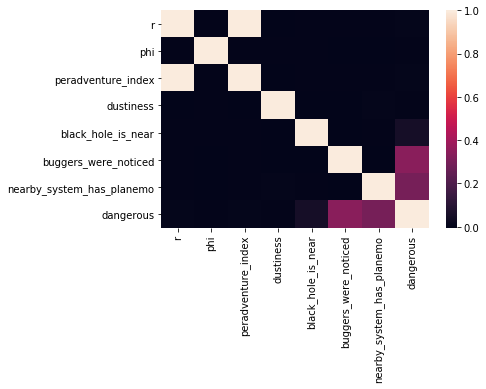

In [126]:
import seaborn as sns
import matplotlib as plt
sns.heatmap(dangerous_place_pd.corr())

In [111]:
Y = dangerous_place_pd.dangerous
X = dangerous_place_pd.drop('dangerous', axis = 1)

In [112]:
clf_rf = RandomForestClassifier()
params = {'max_depth' : range(1,10), 'n_estimators' :[10,20,30],
          'min_samples_leaf' : range(1,20),'min_samples_split' : range(1,20) }

In [114]:
prediction = RandomizedSearchCV(clf_rf, params,cv = 5, n_jobs = -1,verbose = 1)

In [115]:
prediction.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [116]:
prediction.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 17,
 'max_depth': 7}

In [119]:
pd.DataFrame(prediction.best_estimator_.feature_importances_,
             index = X.columns, columns = ['impo']).sort_values(by = 'impo')

,impo
phi,0.005830
r,0.005841
peradventure_index,0.006175
dustiness,0.006563
black_hole_is_near,0.016145
nearby_system_has_planemo,0.412582
buggers_were_noticed,0.546864
